<img src="https://i.postimg.cc/ydZcb9cY/Hello.jpg">

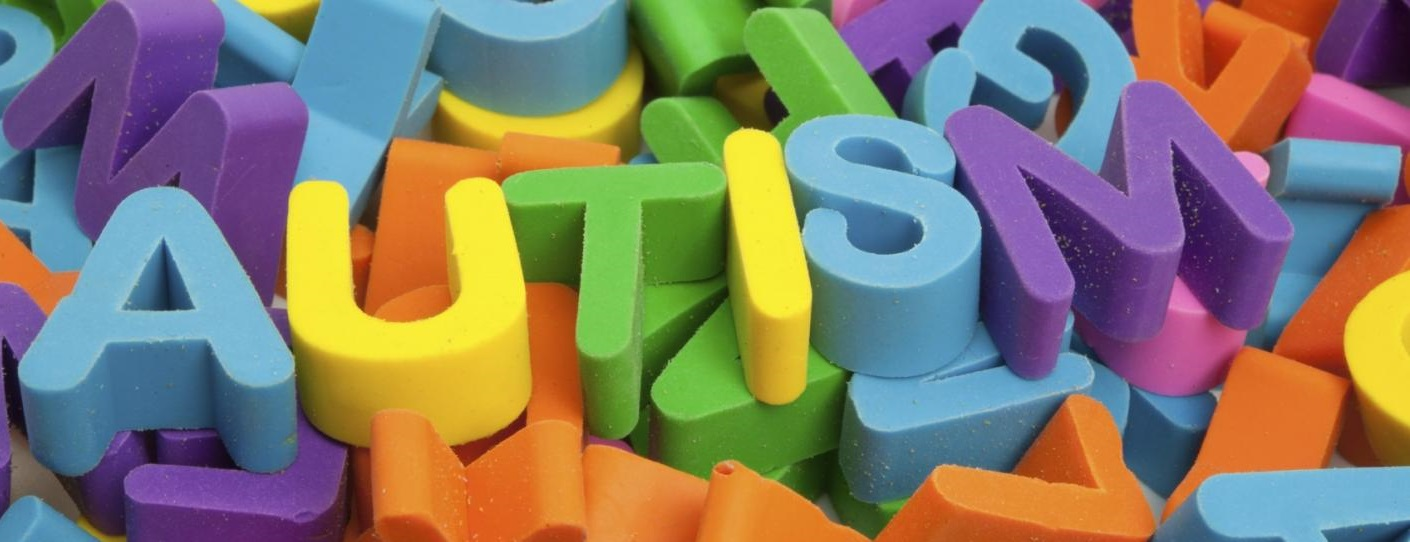

<div style="background-color:#4d9b68; padding:20px; font-size:15px">
    <strong>What is  Autism?</strong> 
    <br>

Autism spectrum disorder is a condition related to brain development that impacts how a person perceives and socializes with others, causing problems in social interaction and communication. 

<a class="anchor" id="About_Data"></a>
# <p style="padding:10px;background-color:#2e5551;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">About Data</p> 

<div style="background-color:#59ae8c; padding:20px; font-size:15px">
    <strong></strong> 
    <br>

**Content:** 

Autism, or autism spectrum disorder (ASD), is a neurodevelopmental condition characterized by challenges with social interaction, communication, and repetitive behaviors. It's called a "spectrum" disorder because it manifests differently in each individual, with a wide variation in symptoms and severity.

**This notebook includes the following:**

- Preprocessing
- Data cleaning
- Exploratory data analysis (EDA)
- Preparing the data to train a model
- Training and making predictions using various classification models
- Model evaluation
    
**Objective:**   
    
Our main objective of this research paper is to predict and diagnosis autism , using machine-learning algorithms, and find out tithmost effective whit respect to confusion matrix, accuracy and precision.

<a id="setup"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/3RCkfPpj/Qi5Jst.jpg);font-family:tahoma;font-size:120%;color:red;text-align:center;border-radius:15px 50px; padding:10px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step 1 | Python Libraries</p></b></h1>

In [1]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#Importing Libraries
import time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")
print("Setup Complete")

Setup Complete


In [2]:
import os
os.getcwd()

'C:\\Users\\dell\\Desktop'

<a id="setup"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/3RCkfPpj/Qi5Jst.jpg);font-family:tahoma;font-size:120%;color:red;text-align:center;border-radius:15px 50px; padding:10px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step 2 | Import Data</p></b></h1>

In [3]:
df = pd.read_csv('Aututism.csv')
df

,age,gender,ethnicity,jundice,autism,relation,contry_of_res,used_app_before,age_desc,A1_Score,...,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result,Class
0,6,Male,Others,no,no,Parent,Jordan,no,'4-11 years',1,...,0,0,1,1,0,1,0,0,5,NO
1,6,Male,Middle-Eastern,no,no,Parent,Jordan,no,'4-11 years',1,...,0,0,1,1,0,1,0,0,5,NO
2,6,Male,Black,no,no,Parent,Jordan,yes,'4-11 years',1,...,0,0,0,1,1,1,0,0,5,NO
3,5,Female,Black,yes,no,Parent,Jordan,no,'4-11 years',0,...,0,0,1,1,0,0,0,1,4,NO
4,5,Male,Others,yes,no,Parent,United States,no,'4-11 years',1,...,1,1,1,1,1,1,1,1,10,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15395,25,Female,White-European,no,no,Self,Russia,no,'18 and more',0,...,0,1,1,0,1,1,1,1,7,YES
15396,34,Male,Hispanic,no,no,Parent,Mexico,no,'18 and more',1,...,0,0,0,0,0,1,0,1,3,NO
15397,24,Female,Latino,no,no,Self,Russia,no,'18 and more',1,...,1,1,1,0,1,1,0,1,7,YES
15398,35,Male,South Asian,no,no,Self,Pakistan,no,'18 and more',1,...,0,1,1,0,1,0,1,1,6,NO


<div style="background-color:lightblue; padding:30px; font-size:15px">
<h2>Table  Information</h2>

|       | **Attribute** | **Information** |
| :---  |     :---      |       :---      |      
| **1** | Age           | The age of the individual.     |                
| **2** | Gender        | The gender of the individual (e.g., Male or Female). |       
| **3** | Ethnicity     | The ethnicity or race of the individual. |
| **4** | Jaundice      | Whether the individual had jaundice (a medical condition) or not (yes or no).|
| **5** | Autism        | Whether the individual has autism or not (yes or no). |                     
| **6** | Relation      | The relationship of the individual to someone with autism (if any). |
| **7** | Country_of_res       | The country of residence of the individual. |   
| **8** | Used_app_before     | Whether the individual has used an application related to autism before (yes or no). |                      
| **9** | Age_desc      |  A description or category of the individual's age. |
| **10** | A1_Score to A10_Score | Scores on different items or questions related to autism assessment. |
| **11** | Result   | The overall result or score of the autism assessment. |                   
| **12** | Class       | The class label indicating whether the individual has autism (1) or not (0). |


<div style="background-color:lightblue; padding:30px; font-size:15px">
<h2>A1-A10 Scores Details  Information</h2>

|       | **Score** | **Score Name** | **Description** |
| :---  |     :---      |  :---      |   :---          |    
| **1** | A1 |Stereotyped Behaviors and Restricted Interests|Assesses the presence and severity of repetitive behaviors and restricted interests.| 
| **2** | A2 |Direct Gaze |Evaluates the individuals ability to make and maintain eye contact during social interactions.|
| **3** | A3 |Facial Expressions |Assesses the range and appropriateness of facial expressions used in social communication.|
| **4** | A4 |Shared Enjoyment in Interaction |Measures the individual's ability to engage in and enjoy social interactions with others.|
| **5** | A5 |Response to Joint Attention |Evaluates the individual's response to attempts to share attention or interest in an object or event.|     
| **6** | A6 |Response to Social Overture | Assesses the individual's response to social approaches or invitations from others.|
| **7** | A7 |Quality of Social Response | Evaluates the quality and appropriateness of the individual's social responses during interactions.|
| **8** | A8 |Amt of Reciprocal Social Communication|Measures the quantity and frequency of reciprocal social communication initiated by the individual| 
| **9** | A9 |Conversation |  Assesses the individual's ability to initiate and maintain conversations with others.|
| **10**|A10 |Overall Level of Reciprocal Social Communication | Provides an overall rating of the individual's reciprocal social communication                  skills based on the observed behaviors across multiple items.  |



In [4]:
df.shape

(15400, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15400 entries, 0 to 15399
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              15400 non-null  int64 
 1   gender           15400 non-null  object
 2   ethnicity        15400 non-null  object
 3   jundice          15400 non-null  object
 4   autism           15400 non-null  object
 5   relation         15400 non-null  object
 6   contry_of_res    15400 non-null  object
 7   used_app_before  15400 non-null  object
 8   age_desc         15400 non-null  object
 9   A1_Score         15400 non-null  int64 
 10  A2_Score         15400 non-null  int64 
 11  A3_Score         15400 non-null  int64 
 12  A4_Score         15400 non-null  int64 
 13  A5_Score         15400 non-null  int64 
 14  A6_Score         15400 non-null  int64 
 15  A7_Score         15400 non-null  int64 
 16  A8_Score         15400 non-null  int64 
 17  A9_Score         15400 non-null

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,15400.0,21.744675,12.931612,4.0,11.0,21.0,30.00,64.0
A1_Score,15400.0,0.699091,0.458668,0.0,0.0,1.0,1.00,1.0
A2_Score,15400.0,0.482727,0.499718,0.0,0.0,0.0,1.00,1.0
A3_Score,15400.0,0.551818,0.497324,0.0,0.0,1.0,1.00,1.0
A4_Score,15400.0,0.530000,0.499115,0.0,0.0,1.0,1.00,1.0
A5_Score,15400.0,0.587273,0.492341,0.0,0.0,1.0,1.00,1.0
A6_Score,15400.0,0.443636,0.496829,0.0,0.0,0.0,1.00,1.0
A7_Score,15400.0,0.477273,0.499499,0.0,0.0,0.0,1.00,1.0
A8_Score,15400.0,0.605455,0.488769,0.0,0.0,1.0,1.00,1.0
A9_Score,15400.0,0.412727,0.492341,0.0,0.0,0.0,1.00,1.0


In [7]:
df.isnull().sum()

age                0
gender             0
ethnicity          0
jundice            0
autism             0
relation           0
contry_of_res      0
used_app_before    0
age_desc           0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
result             0
Class              0
dtype: int64

In [8]:
df.nunique()

age                58
gender              2
ethnicity          10
jundice             2
autism              2
relation            6
contry_of_res      89
used_app_before     2
age_desc            4
A1_Score            2
A2_Score            2
A3_Score            2
A4_Score            2
A5_Score            2
A6_Score            2
A7_Score            2
A8_Score            2
A9_Score            2
A10_Score           2
result             11
Class               2
dtype: int64

In [9]:
#Drop unwanted columns
df = df.drop(['age_desc', 'used_app_before', 'relation', 'result'], axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15400 entries, 0 to 15399
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15400 non-null  int64 
 1   gender         15400 non-null  object
 2   ethnicity      15400 non-null  object
 3   jundice        15400 non-null  object
 4   autism         15400 non-null  object
 5   contry_of_res  15400 non-null  object
 6   A1_Score       15400 non-null  int64 
 7   A2_Score       15400 non-null  int64 
 8   A3_Score       15400 non-null  int64 
 9   A4_Score       15400 non-null  int64 
 10  A5_Score       15400 non-null  int64 
 11  A6_Score       15400 non-null  int64 
 12  A7_Score       15400 non-null  int64 
 13  A8_Score       15400 non-null  int64 
 14  A9_Score       15400 non-null  int64 
 15  A10_Score      15400 non-null  int64 
 16  Class          15400 non-null  object
dtypes: int64(11), object(6)
memory usage: 2.0+ MB


In [11]:
#Rename the columns
df.rename(columns = {'jundice':'jaundice', 'contry_of_res':'country_of_res'}, inplace = True)

In [12]:
df.dtypes

age                int64
gender            object
ethnicity         object
jaundice          object
autism            object
country_of_res    object
A1_Score           int64
A2_Score           int64
A3_Score           int64
A4_Score           int64
A5_Score           int64
A6_Score           int64
A7_Score           int64
A8_Score           int64
A9_Score           int64
A10_Score          int64
Class             object
dtype: object

<a id="setup"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/3RCkfPpj/Qi5Jst.jpg);font-family:tahoma;font-size:120%;color:red;text-align:center;border-radius:15px 50px; padding:10px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step 3 | Data Visualization</p></b></h1>

In [13]:
#Total number of records
n_records = len(df.index)

#Number of records where individual's with ASD
n_asd_yes = len(df[df['Class'] == 'YES'])

#Number of records where individual's with no ASD
n_asd_no = len(df[df['Class'] == 'NO'])

#Percentage of individuals whose are with ASD
yes_percent = float(n_asd_yes) / n_records *100

# Print the results
print ("Total number of records:", n_records)
print ("Individuals diagonised with ASD:", n_asd_yes)
print ("Individuals not diagonised with ASD:", n_asd_no)
print ("Percentage of individuals diagonised with ASD:", yes_percent)

Total number of records: 15400
Individuals diagonised with ASD: 5502
Individuals not diagonised with ASD: 9898
Percentage of individuals diagonised with ASD: 35.72727272727273


# Data Processing

# Gender

In [14]:
df['gender'].replace('Male',0, inplace=True)
df['gender'].replace('Female',1, inplace=True)

In [15]:
df.gender.value_counts()

gender
0    8750
1    6650
Name: count, dtype: int64

# Ethnicity       

In [16]:
df['ethnicity'].replace('Asian',0, inplace=True)
df['ethnicity'].replace('Black',1, inplace=True)
df['ethnicity'].replace('White-European',2, inplace=True)
df['ethnicity'].replace('Hispanic',3, inplace=True)
df['ethnicity'].replace('Latino',4, inplace=True)
df['ethnicity'].replace('Middle-Eastern',5, inplace=True)
df['ethnicity'].replace('Others',6, inplace=True)
df['ethnicity'].replace('Pasifika',7, inplace=True)
df['ethnicity'].replace('South Asian',8, inplace=True)
df['ethnicity'].replace('Turkish',9, inplace=True)

In [17]:
df.ethnicity.value_counts()

ethnicity
2    5376
0    2618
5    2394
1    1778
6    1050
8     826
4     658
3     392
7     196
9     112
Name: count, dtype: int64

# jaundice

In [18]:
df['jaundice'].replace('yes',0, inplace=True)
df['jaundice'].replace('no',1, inplace=True)

In [19]:
df.jaundice.value_counts()

jaundice
1    13090
0     2310
Name: count, dtype: int64

# autism

In [20]:
df['autism'].replace('yes',0, inplace=True)
df['autism'].replace('no',1, inplace=True)

# country_of_res

In [21]:
# Define a dictionary mapping country names to numeric codes
country_codes = {
    'Jordan': 0, 'United States': 1, 'Egypt': 2, 'United Kingdom': 3, 'Bahrain': 4, 'Austria': 5, 'Kuwait': 6, 'United Arab Emirates': 7, 'Europe': 8,
    'Malta': 9, 'Bulgaria': 10, 'South Africa': 11, 'India': 12, 'Afghanistan': 13, 'Georgia': 14, 'New Zealand': 15, 'Syria': 16, 'Iraq': 17,
    'Australia': 18, 'Saudi Arabia': 19, 'Armenia': 20, 'Turkey': 21, 'Pakistan': 22, 'Canada': 23, 'Oman': 24, 'Brazil': 25, 'South Korea': 26,
    'Costa Rica': 27, 'Sweden': 28, 'Philippines': 29, 'Malaysia': 30, 'Argentina': 31, 'Japan': 32, 'Bangladesh': 33, 'Qatar': 34, 'Ireland': 35,
    'Romania': 36, 'Netherlands': 37, 'Lebanon': 38, 'Germany': 39, 'Latvia': 40, 'Russia': 41, 'Italy': 42, 'China': 43, 'Nigeria': 44,
    'U.S. Outlying Islands': 45, 'Nepal': 46, 'Mexico': 47, 'Isle of Man': 48, 'Libya': 49, 'Ghana': 50, 'Bhutan': 51, 'AmericanSamoa': 52, 'Albania': 53,
    'Belgium': 54, 'Azerbaijan': 55, 'Croatia': 56, 'France': 57, 'Indonesia': 58, 'Greenland': 59, 'Bahamas': 60, 'Viet Nam': 61, 'Comoros': 62,
    'Portugal': 63, 'Finland': 64, 'Norway': 65, 'Anguilla': 66, 'Spain': 67, 'Burundi': 68, 'Chile': 69, 'Tonga': 70, 'Sri Lanka': 71,
    'Sierra Leone': 72, 'Ethiopia': 73, 'Iran': 74, 'Iceland': 75, 'Nicaragua': 76, 'Hong Kong': 77, 'Ukraine': 78, 'Kazakhstan': 79, 'Uruguay': 80,
    'Serbia': 81, 'Ecuador': 82, 'Niger': 83, 'Bolivia': 84, 'Aruba':85, 'Angola': 86, 'Czech Republic': 87, 'Cyprus': 88
}

# Assuming `df` is a pandas DataFrame and `country_of_res` is a column in it
# Replace country names with numeric codes using the dictionary
df['country_of_res'] = df['country_of_res'].replace(country_codes)

In [22]:
df.country_of_res.value_counts()

country_of_res
1     2338
3     2170
12    1820
15    1330
7     1260
      ... 
62      14
65      14
66      14
68      14
88      14
Name: count, Length: 89, dtype: int64

# Class

In [23]:
df['Class'].replace('YES',0, inplace=True)
df['Class'].replace('NO',1, inplace=True)

In [24]:
df.Class.value_counts()

Class
1    9898
0    5502
Name: count, dtype: int64

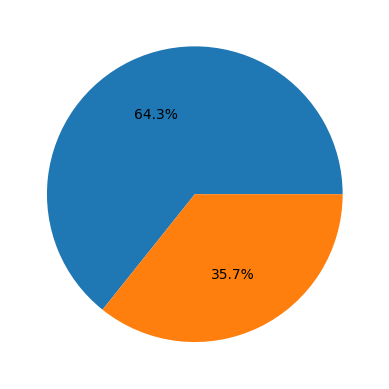

In [25]:
# Creating a pie chart to visualize the distribution of values in the 'Class/ASD' column
plt.pie(df['Class'].value_counts().values, autopct='%1.1f%%')
plt.show()

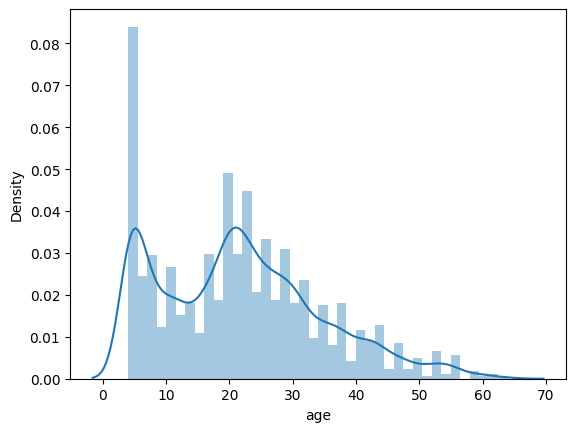

In [26]:
# Plotting a distribution plot for the 'age' column
sns.distplot(df['age'])
plt.show()

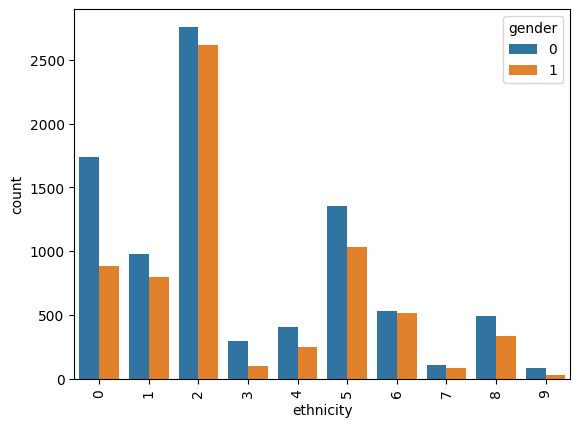

In [27]:
sns.countplot(x='ethnicity', hue='gender', data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

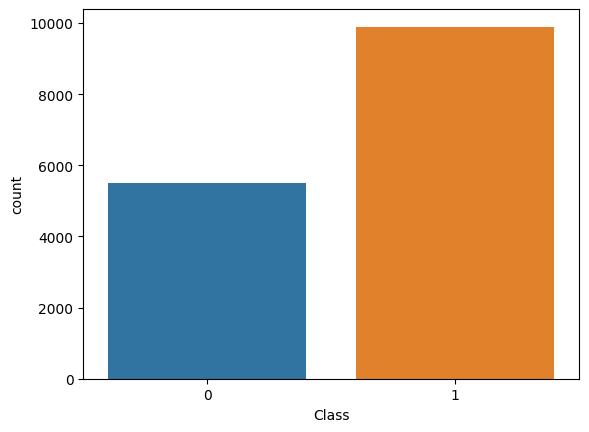

In [28]:
sns.countplot(data=df, x='Class')
plt.show()

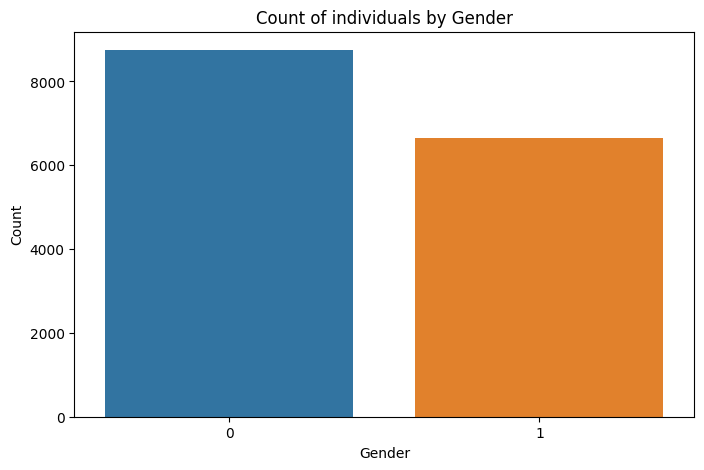

In [29]:
# Create the countplot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='gender', order=df['gender'].value_counts().index)

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of individuals by Gender')

# Show the plot
plt.show()


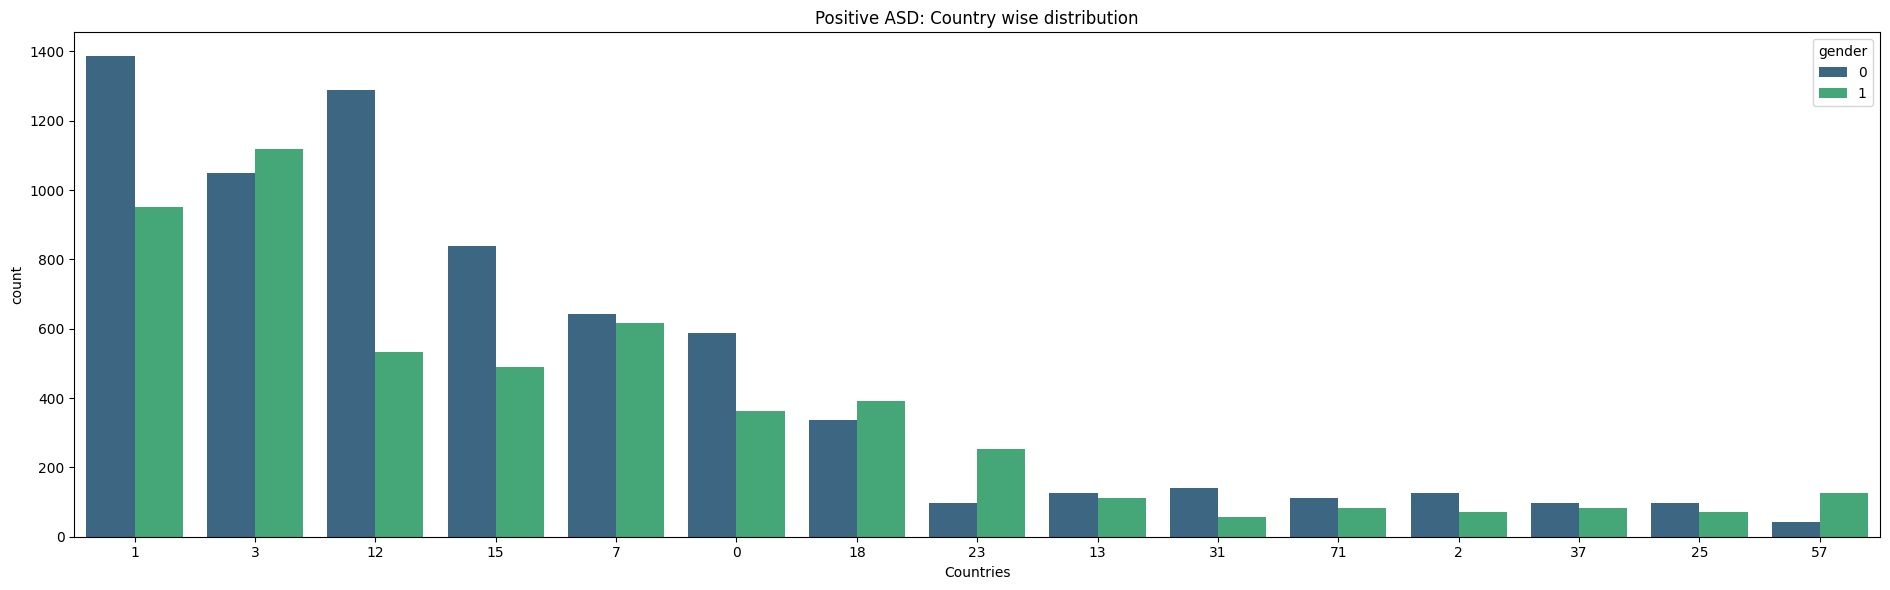

In [30]:
#Visualize positive ASD positive Adults based on top 15 countries
plt.figure(figsize=(19,6))
sns.countplot(x='country_of_res',data = df, order= df['country_of_res'].value_counts().index[:15],hue='gender',palette='viridis')
plt.title('Positive ASD: Country wise distribution')
plt.xlabel('Countries')
plt.tight_layout()

<Axes: xlabel='jaundice', ylabel='count'>

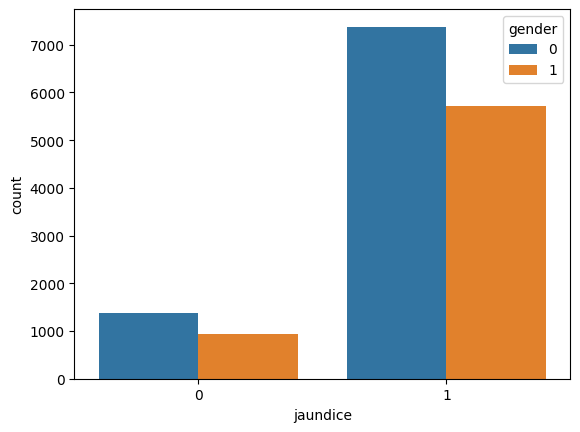

In [31]:
#Countplot of ASD positive born with Jaundice based on gender 
sns.countplot(x = 'jaundice', hue = 'gender', data = df)

In [32]:
df.isnull().sum()

age               0
gender            0
ethnicity         0
jaundice          0
autism            0
country_of_res    0
A1_Score          0
A2_Score          0
A3_Score          0
A4_Score          0
A5_Score          0
A6_Score          0
A7_Score          0
A8_Score          0
A9_Score          0
A10_Score         0
Class             0
dtype: int64

In [33]:
df.dtypes

age               int64
gender            int64
ethnicity         int64
jaundice          int64
autism            int64
country_of_res    int64
A1_Score          int64
A2_Score          int64
A3_Score          int64
A4_Score          int64
A5_Score          int64
A6_Score          int64
A7_Score          int64
A8_Score          int64
A9_Score          int64
A10_Score         int64
Class             int64
dtype: object

In [34]:
#Create X and y dataset
X = df.iloc[:,:-1].values
y = df.iloc[:,16].values

In [35]:
X

array([[ 6,  0,  6, ...,  1,  0,  0],
       [ 6,  0,  5, ...,  1,  0,  0],
       [ 6,  0,  1, ...,  1,  0,  0],
       ...,
       [24,  1,  4, ...,  1,  0,  1],
       [35,  0,  8, ...,  0,  1,  1],
       [26,  1,  2, ...,  1,  1,  1]], dtype=int64)

In [36]:
y

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [37]:
df.columns

Index(['age', 'gender', 'ethnicity', 'jaundice', 'autism', 'country_of_res',
       'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'Class'],
      dtype='object')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15400 entries, 0 to 15399
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             15400 non-null  int64
 1   gender          15400 non-null  int64
 2   ethnicity       15400 non-null  int64
 3   jaundice        15400 non-null  int64
 4   autism          15400 non-null  int64
 5   country_of_res  15400 non-null  int64
 6   A1_Score        15400 non-null  int64
 7   A2_Score        15400 non-null  int64
 8   A3_Score        15400 non-null  int64
 9   A4_Score        15400 non-null  int64
 10  A5_Score        15400 non-null  int64
 11  A6_Score        15400 non-null  int64
 12  A7_Score        15400 non-null  int64
 13  A8_Score        15400 non-null  int64
 14  A9_Score        15400 non-null  int64
 15  A10_Score       15400 non-null  int64
 16  Class           15400 non-null  int64
dtypes: int64(17)
memory usage: 2.0 MB


In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,15400.0,21.744675,12.931612,4.0,11.0,21.0,30.0,64.0
gender,15400.0,0.431818,0.495346,0.0,0.0,0.0,1.0,1.0
ethnicity,15400.0,2.830909,2.323190,0.0,1.0,2.0,5.0,9.0
jaundice,15400.0,0.850000,0.357083,0.0,1.0,1.0,1.0,1.0
autism,15400.0,0.860000,0.346998,0.0,1.0,1.0,1.0,1.0
country_of_res,15400.0,16.344545,19.260863,0.0,3.0,12.0,19.0,88.0
A1_Score,15400.0,0.699091,0.458668,0.0,0.0,1.0,1.0,1.0
A2_Score,15400.0,0.482727,0.499718,0.0,0.0,0.0,1.0,1.0
A3_Score,15400.0,0.551818,0.497324,0.0,0.0,1.0,1.0,1.0
A4_Score,15400.0,0.530000,0.499115,0.0,0.0,1.0,1.0,1.0


In [40]:
df.corr()

,age,gender,ethnicity,jaundice,autism,country_of_res,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Class
age,1.000000,0.135400,-0.050695,0.114450,-0.044841,0.028165,0.063401,-0.023233,-0.165653,-0.001389,-0.183696,-0.287143,-0.122546,0.071670,-0.101734,-0.085586,0.118742
gender,0.135400,1.000000,0.018422,0.021845,-0.076695,0.003844,0.083760,0.013606,-0.052087,0.037692,-0.011014,-0.006381,-0.087101,-0.039770,0.014742,0.021332,-0.027942
ethnicity,-0.050695,0.018422,1.000000,0.008877,0.024766,-0.026411,-0.082734,-0.032274,-0.052219,-0.093633,-0.037173,-0.042915,-0.098894,-0.017923,-0.119412,-0.073710,0.112325
jaundice,0.114450,0.021845,0.008877,1.000000,0.094652,0.043999,0.046350,-0.149537,-0.102134,-0.007907,-0.083258,-0.127090,-0.067538,0.041152,-0.056367,-0.091352,0.079960
autism,-0.044841,-0.076695,0.024766,0.094652,1.000000,0.054148,-0.064777,-0.040162,-0.063325,-0.122730,-0.088126,-0.056321,-0.007868,0.012008,-0.103452,-0.071532,0.092836
country_of_res,0.028165,0.003844,-0.026411,0.043999,0.054148,1.000000,-0.091586,0.003405,-0.028582,-0.081319,0.016051,0.008822,-0.039490,-0.045628,-0.014326,-0.014179,0.054018
A1_Score,0.063401,0.083760,-0.082734,0.046350,-0.064777,-0.091586,1.000000,0.026904,0.042454,0.144676,0.146494,0.067199,0.118958,0.111140,0.119220,0.097368,-0.290603
A2_Score,-0.023233,0.013606,-0.032274,-0.149537,-0.040162,0.003405,0.026904,1.000000,0.197488,0.151527,0.107747,0.177341,0.009354,0.001875,0.169397,0.063081,-0.285832
A3_Score,-0.165653,-0.052087,-0.052219,-0.102134,-0.063325,-0.028582,0.042454,0.197488,1.000000,0.374652,0.273004,0.341137,0.114536,0.035491,0.328510,0.194349,-0.462104
A4_Score,-0.001389,0.037692,-0.093633,-0.007907,-0.122730,-0.081319,0.144676,0.151527,0.374652,1.000000,0.268674,0.323954,0.123076,0.104424,0.345480,0.197121,-0.508243


<a id="setup"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/3RCkfPpj/Qi5Jst.jpg);font-family:tahoma;font-size:120%;color:red;text-align:center;border-radius:15px 50px; padding:10px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step 4 | Model Building</p></b></h1>

In [41]:
# Splitting the dataset in features and label
X = df.drop('Class', axis=1)
y = df['Class']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<a id="rf"></a>
<h2><b><span style="color:#009b2d"> Step 4.1 | </span><span style="color:#9b006e">DecisionTreeClassifier</span></b></h2>  

In [43]:
DTs = DecisionTreeClassifier()
DTs.fit(X_train, y_train)
DTs_pred = DTs.predict(X_test)
DTs_acc = accuracy_score(DTs_pred, y_test)
print("Test accuracy: {:.2f}%".format(DTs_acc*100))

Test accuracy: 100.00%


In [44]:
print(classification_report(y_test, DTs_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1593
           1       1.00      1.00      1.00      3027

    accuracy                           1.00      4620
   macro avg       1.00      1.00      1.00      4620
weighted avg       1.00      1.00      1.00      4620



<a id="rf"></a>
<h2><b><span style="color:#009b2d"> Step 4.2 | </span><span style="color:#9b006e">LogisticRegression</span></b></h2> 

In [45]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(lr_pred, y_test)
print("Test accuracy: {:.2f}%".format(lr_acc*100))

Test accuracy: 100.00%


In [46]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1593
           1       1.00      1.00      1.00      3027

    accuracy                           1.00      4620
   macro avg       1.00      1.00      1.00      4620
weighted avg       1.00      1.00      1.00      4620



<a id="rf"></a>
<h2><b><span style="color:#009b2d"> Step 4.3 | </span><span style="color:#9b006e">RandomForestClassifier</span></b></h2>

In [47]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
rfc_acc = accuracy_score(rfc_pred, y_test)
print("Test accuracy: {:.2f}%".format(rfc_acc*100))

Test accuracy: 100.00%


In [48]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1593
           1       1.00      1.00      1.00      3027

    accuracy                           1.00      4620
   macro avg       1.00      1.00      1.00      4620
weighted avg       1.00      1.00      1.00      4620



<a id="rf"></a>
<h2><b><span style="color:#009b2d"> Step 4.4 | </span><span style="color:#9b006e">KNeighborsClassifier</span></b></h2>

In [49]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(knn_pred, y_test)
print("Test accuracy: {:.2f}%".format(knn_acc*100))

Test accuracy: 100.00%


In [50]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1593
           1       1.00      1.00      1.00      3027

    accuracy                           1.00      4620
   macro avg       1.00      1.00      1.00      4620
weighted avg       1.00      1.00      1.00      4620



<a id="rf"></a>
<h2><b><span style="color:#009b2d"> Step 4.5 | </span><span style="color:#9b006e">SVC </span></b></h2>

In [51]:
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 97.47%


In [52]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1593
           1       0.98      0.99      0.98      3027

    accuracy                           0.97      4620
   macro avg       0.97      0.97      0.97      4620
weighted avg       0.97      0.97      0.97      4620



<a id="rf"></a>
<h2><b><span style="color:#009b2d"> Step 4.6 | </span><span style="color:#9b006e">GaussianNB </span></b></h2>

In [53]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
gnb_acc = accuracy_score(gnb_pred, y_test)
print("Test accuracy: {:.2f}%".format(gnb_acc*100))

Test accuracy: 94.70%


In [54]:
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Smoothing parameter for variance calculation
}
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='accuracy')

In [55]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'var_smoothing': 1e-05}


In [56]:
gnb = GaussianNB(var_smoothing = 1e-05 )
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
gnb_acc = accuracy_score(gnb_pred, y_test)
print("Test accuracy: {:.2f}%".format(gnb_acc*100))

Test accuracy: 94.68%


In [57]:
print(classification_report(y_test, gnb_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1593
           1       0.96      0.96      0.96      3027

    accuracy                           0.95      4620
   macro avg       0.94      0.94      0.94      4620
weighted avg       0.95      0.95      0.95      4620



<a id="rf"></a>
<h2><b><span style="color:#009b2d"> Step 4.7 | </span><span style="color:#9b006e">XGBClassifier </span></b></h2>

In [58]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_acc = accuracy_score(xgb_pred, y_test)
print("Test accuracy: {:.2f}%".format(xgb_acc*100))

Test accuracy: 100.00%


In [59]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1593
           1       1.00      1.00      1.00      3027

    accuracy                           1.00      4620
   macro avg       1.00      1.00      1.00      4620
weighted avg       1.00      1.00      1.00      4620



<a id="rf"></a>
<h2><b><span style="color:#009b2d"> Step 4.8 | </span><span style="color:#9b006e">MultinomialNB </span></b></h2>

In [60]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
mnb_pred = mnb.predict(X_test)
mnb_acc = accuracy_score(mnb_pred, y_test)
print("Test accuracy: {:.2f}%".format(mnb_acc*100))

Test accuracy: 80.71%


In [61]:
print(classification_report(y_test, mnb_pred))

              precision    recall  f1-score   support

           0       0.69      0.79      0.74      1593
           1       0.88      0.82      0.85      3027

    accuracy                           0.81      4620
   macro avg       0.79      0.80      0.79      4620
weighted avg       0.82      0.81      0.81      4620



In [62]:
result = pd.DataFrame({
    'Model': ['DecisionTreeClassifier', 'LogisticRegression', 'RandomForestClassifier','KNeighborsClassifier', 'SVC','GaussianNB','XGBClassifier','MultinomialNB'],
    'Accuracy' : [DTs_acc,lr_acc, rfc_acc, knn_acc, svc_acc, gnb_acc,xgb_acc,mnb_acc]
})
result['Accuracy'] = result['Accuracy'].round(4)

result.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,DecisionTreeClassifier,1.0000
1,LogisticRegression,1.0000
2,RandomForestClassifier,1.0000
3,KNeighborsClassifier,1.0000
6,XGBClassifier,1.0000
4,SVC,0.9747
5,GaussianNB,0.9468
7,MultinomialNB,0.8071


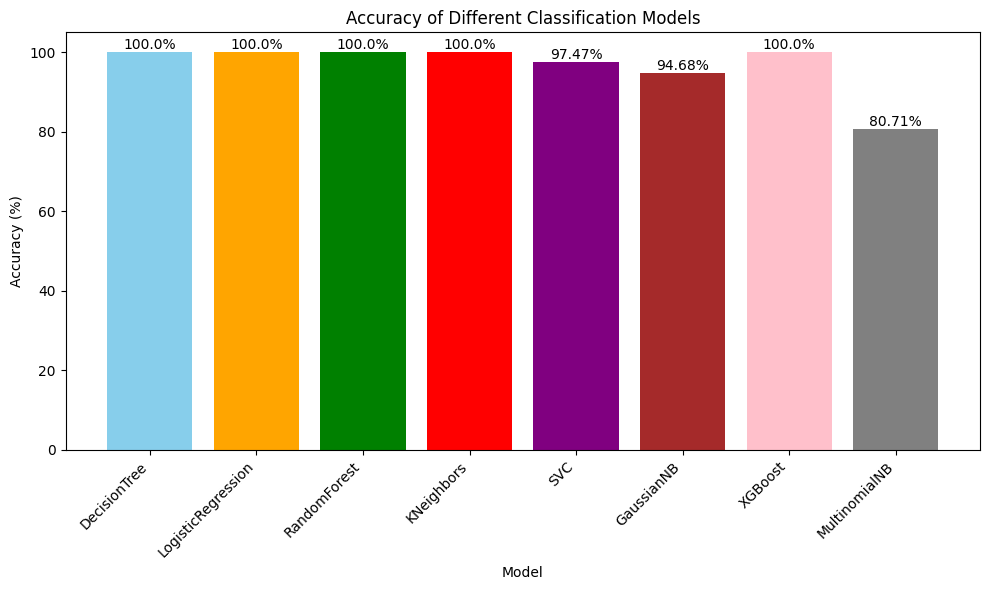

In [63]:
# Define the data
models = ['DecisionTree', 'LogisticRegression', 'RandomForest', 'KNeighbors', 'SVC', 'GaussianNB', 'XGBoost', 'MultinomialNB']
accuracies = [DTs_acc, lr_acc, rfc_acc, knn_acc, svc_acc, gnb_acc, xgb_acc, mnb_acc]

# Round the accuracies
accuracies_rounded = [round(acc * 100, 2) for acc in accuracies]

# Define colors for each bar
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies_rounded, color=colors)

# Add data labels on top of each bar
for bar, acc in zip(bars, accuracies_rounded):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{acc}%', 
             ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Different Classification Models')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


<div style="border-radius:20px; padding: 15px; font-size:100%; text-align:left; background-image: url(https://i.postimg.cc/3RCkfPpj/Qi5Jst.jpg)">

<h3 style="font-size:185%; font-weight:bolder; color:yellow">Results : </h3>

<span style="font-size:120%; font-weight:700; color:yellow">Acording to the above plots, best Model  base on Score is :</span>

<span style="font-size:100%; font-weight:500; color:yellow">
<ul><b>DecisionTreeClassifier</b></ul>
</br>
</span>

<span style="font-size:150%; font-weight:bolder; color:yellow">So, We choose <mark> DecisionTreeClassifier </mark></span>
</div>

<img src='https://i.postimg.cc/t4b3WtCy/1000-F-291522205-Xkrm-S421-Fj-SGTMR.jpg'>